In [2]:
import MoRIC_common_func as cf

In [3]:
directory = cf.format_path(r'E:\TW1Cont\MoRIC\Batch2_2112')
cf.enter_dir(directory)
p = cf.load_data_list('*.2CL')

File list loaded.


In [ ]:
# Find coordinates at the centre of every frame and reorganize into a single dataframe
df_centre = cf.pd.DataFrame(columns=['Longitude', 'Latitude'])
for path in p:
    coor = cf.read_pds(path)[1]
    #print(coor)
    coor_centre = coor.iloc[[int(1088/2)]]
    df_centre.loc[path] = [coor_centre['Longitude'].values[0], coor_centre['Latitude'].values[0]]
    print('Added ' + path + ' centre coordinates to list')

In [4]:
# Saving centre coordinates as pickle file
df_centre.to_pickle(r'coor_centre')

In [6]:
# Reading pickle stream of image coordinates
df_coor = cf.pd.read_pickle(r'coor_centre')
#print(df_coor)

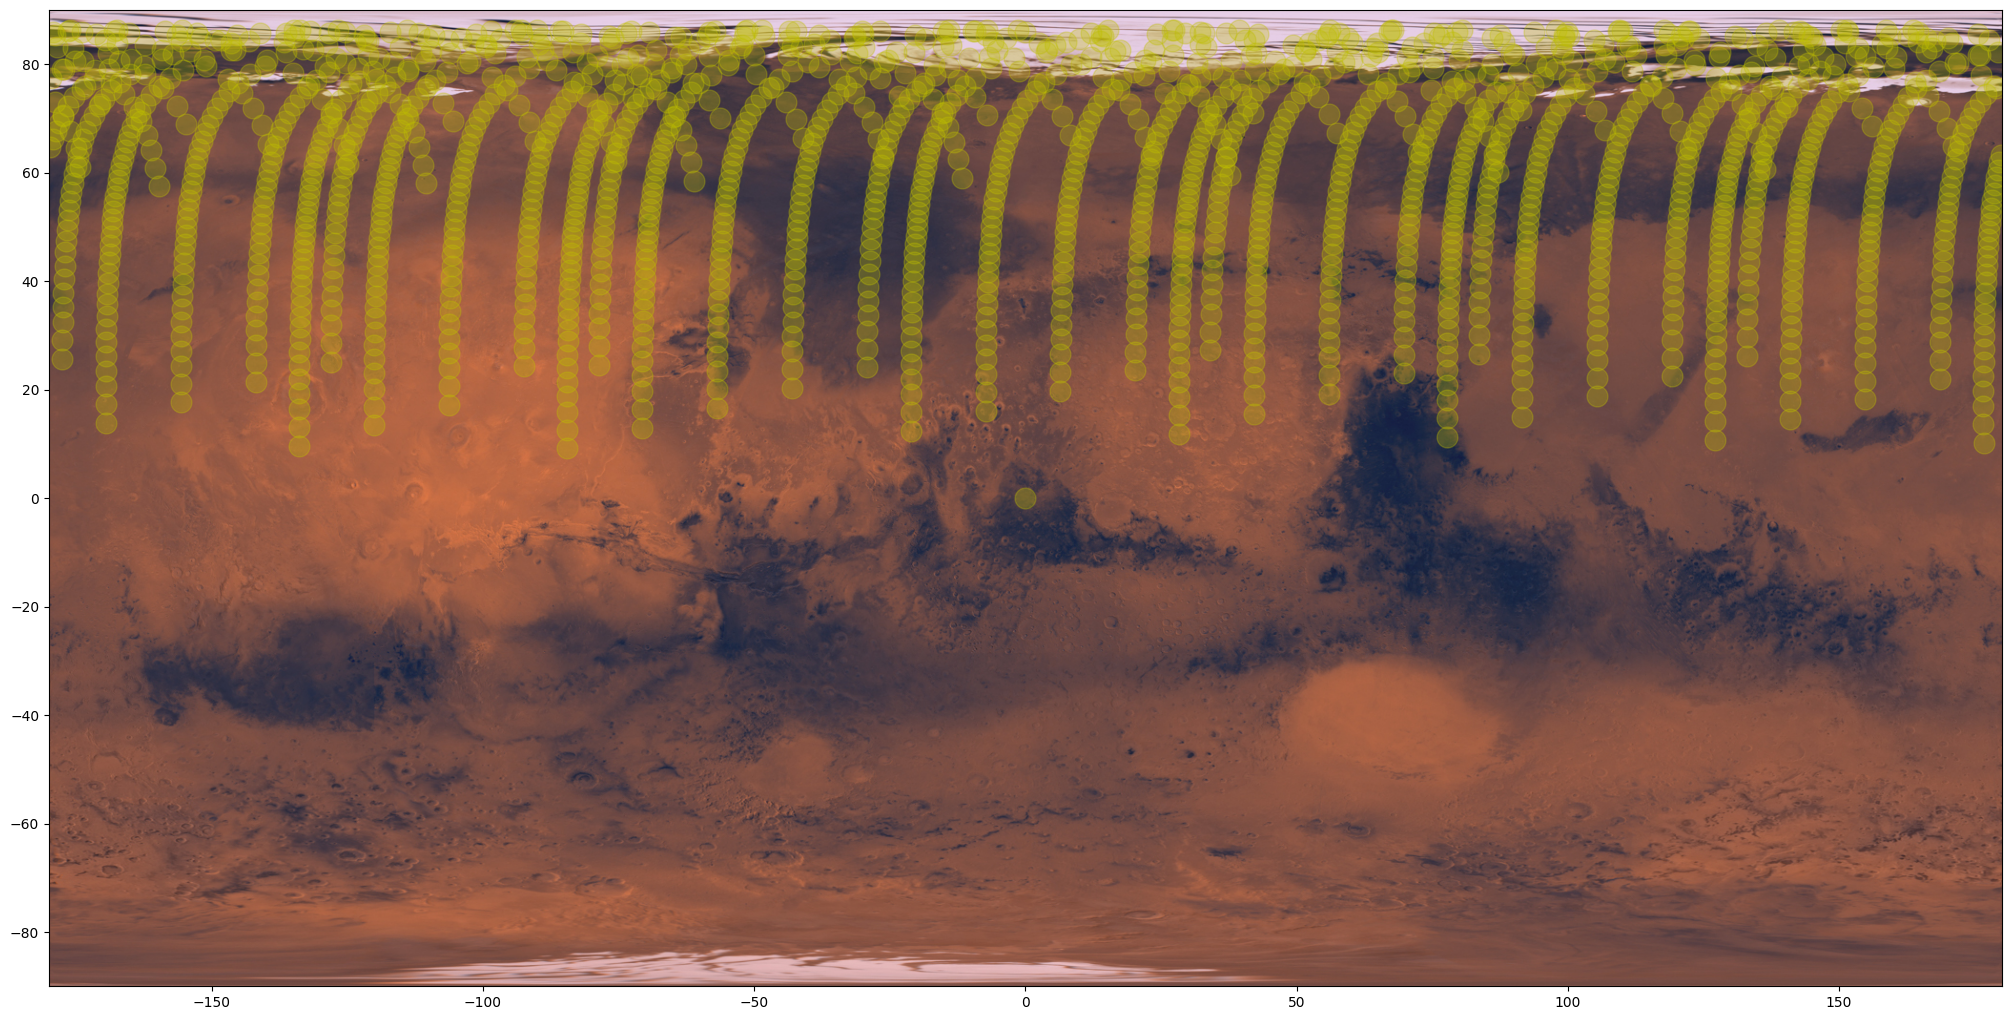

In [17]:
# Plot a preview of all centres of batch images
layout = [['Preview Map']]
gs_kw = dict(width_ratios=[1], height_ratios=[1])
path_map = cf.format_path(r'E:\TW1Cont\MoRIC\Mars_Viking_ClrMosaic_global_925m-2.jpg')

fig_preview, axes = cf.create_plot_layout(layout, gs_kw, figsize=(10, 10))
cf.plot_base_map(axes['Preview Map'], path_map)
axes['Preview Map'].plot(df_coor['Longitude'], df_coor['Latitude'], '.y', alpha=0.3, markersize=30)

cf.plt.show()
#cf.plt.close()

In [14]:
# Search for closest images in a defined radius around a POI (Point of Interest)
POI = 'Korolev'
search_radius = 300
coor_POI = '72.77N, 164.58E'

print(f'POI: {POI}')
df_POI = cf.gen_coor(coor_POI)
print(f'Within a search radius of {search_radius} km around {POI} ', end='')
dist_closest = cf.find_closest_images(df_POI, df_coor, search_radius=search_radius)
print(f'({len(dist_closest)} images): ')
for key in dist_closest:
    print(f'{key} => {dist_closest[key]:.2f} km')
dist_closest_list = list(dist_closest.keys())

POI: Korolev
Longitude: 164.58, Latitude: 72.77
Within a search radius of 300 km around Korolev (22 images): 
HX1-Or_GRAS_MoRIC-F-0028_SCI_N_20211216185518_20211216185518_00686_A.2CL => 54.77 km
HX1-Or_GRAS_MoRIC-F-0029_SCI_N_20211216185541_20211216185541_00686_A.2CL => 73.74 km
HX1-Or_GRAS_MoRIC-F-0044_SCI_N_20211214032133_20211214032133_00677_A.2CL => 90.37 km
HX1-Or_GRAS_MoRIC-F-0045_SCI_N_20211214032223_20211214032223_00677_A.2CL => 103.83 km
HX1-Or_GRAS_MoRIC-F-0027_SCI_N_20211216185455_20211216185455_00686_A.2CL => 130.46 km
HX1-Or_GRAS_MoRIC-F-0030_SCI_N_20211216185606_20211216185606_00686_A.2CL => 163.09 km
HX1-Or_GRAS_MoRIC-F-0046_SCI_N_20211220080108_20211220080108_00698_A.2CL => 190.85 km
HX1-Or_GRAS_MoRIC-F-0026_SCI_N_20211210141642_20211210141642_00665_A.2CL => 197.79 km
HX1-Or_GRAS_MoRIC-F-0025_SCI_N_20211210141619_20211210141619_00665_A.2CL => 201.22 km
HX1-Or_GRAS_MoRIC-F-0026_SCI_N_20211216185432_20211216185432_00686_A.2CL => 218.21 km
HX1-Or_GRAS_MoRIC-F-0043_SCI_N_20

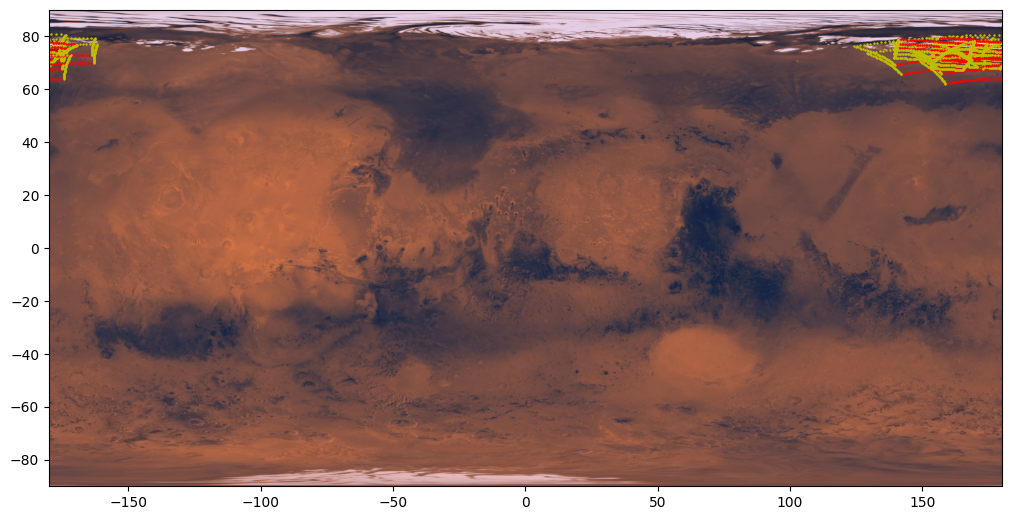

In [11]:
# Preview boundaries associated with the closest images
layout = [['Map']]
gs_kw = dict(width_ratios=[1], height_ratios=[1])
path_map = cf.format_path(r'E:\TW1Cont\MoRIC\Mars_Viking_ClrMosaic_global_925m-2.jpg')

fig_map, axes = cf.create_plot_layout(layout, gs_kw, figsize=(10, 10))
cf.plot_base_map(axes['Map'], path_map)
for path in dist_closest:
    coor = cf.read_pds(path)[1]
    #print(coor)
    upper, other = cf.prune_coor(coor)
    #print('Plotting ' + path)
    cf.plot_coor(axes['Map'], upper, other)

cf.plt.show()
#cf.plt.close()

In [15]:
cf.export_image_list(dist_closest_list, POI)

Creating subfolder POI Batch - Korolev
Processing and exporting file (1) HX1-Or_GRAS_MoRIC-F-0028_SCI_N_20211216185518_20211216185518_00686_A
DONE
Processing and exporting file (2) HX1-Or_GRAS_MoRIC-F-0029_SCI_N_20211216185541_20211216185541_00686_A
DONE
Processing and exporting file (3) HX1-Or_GRAS_MoRIC-F-0044_SCI_N_20211214032133_20211214032133_00677_A
DONE
Processing and exporting file (4) HX1-Or_GRAS_MoRIC-F-0045_SCI_N_20211214032223_20211214032223_00677_A
DONE
Processing and exporting file (5) HX1-Or_GRAS_MoRIC-F-0027_SCI_N_20211216185455_20211216185455_00686_A
DONE
Processing and exporting file (6) HX1-Or_GRAS_MoRIC-F-0030_SCI_N_20211216185606_20211216185606_00686_A
DONE
Processing and exporting file (7) HX1-Or_GRAS_MoRIC-F-0046_SCI_N_20211220080108_20211220080108_00698_A
DONE
Processing and exporting file (8) HX1-Or_GRAS_MoRIC-F-0026_SCI_N_20211210141642_20211210141642_00665_A
DONE
Processing and exporting file (9) HX1-Or_GRAS_MoRIC-F-0025_SCI_N_20211210141619_20211210141619_00